In [2]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn import datasets

In [4]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [5]:
df=pd.read_csv('../datasets/titanic/train.csv') 

In [34]:
labelList=['yes', 'no', 'no', 'yes','hah']
nolist=[18,12,34,56,23,12,45,81,29,98]
x=[[ 1., -1., 2.], [ 2., 0., 0.],[ 0., 1., -1.]]
no=np.array(nolist)
no=no.reshape(-1,1)
lb=preprocessing.Normalizer()
lb.fit_transform(x)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [7]:
df=df.drop(['PassengerId','Name'],axis=1)

In [8]:
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  
0   NaN        S  
1   C85        C  
2   NaN        S  
3  C123        S  
4   NaN        S  


In [9]:
Survived_fq=df.Survived.value_counts()
print(Survived_fq)

0    549
1    342
Name: Survived, dtype: int64


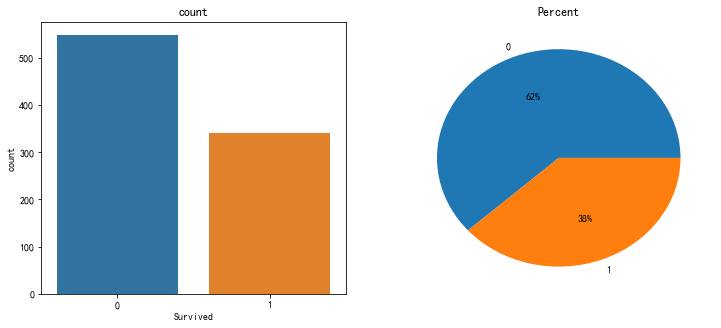

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x='Survived',data=df)
plt.title('count')
plt.subplot(122)
plt.pie(Survived_fq,labels=Survived_fq.index,autopct='%1.0f%%')
plt.title('Percent')
plt.show()

In [11]:
Pclass_fq=df.Pclass.value_counts()
print(Pclass_fq)

3    491
1    216
2    184
Name: Pclass, dtype: int64


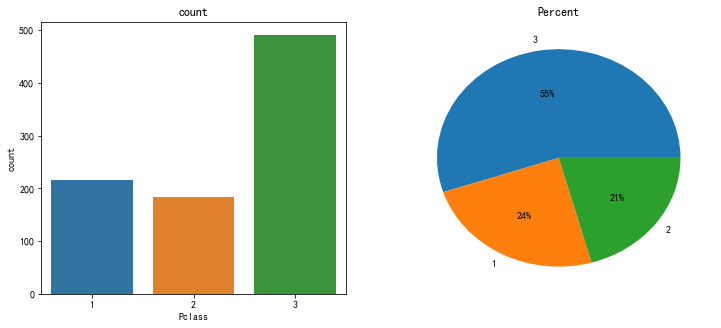

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x='Pclass',data=df)
plt.title('count')
plt.subplot(122)
plt.pie(Pclass_fq,labels=Pclass_fq.index,autopct='%1.0f%%')
plt.title('Percent')
plt.show()

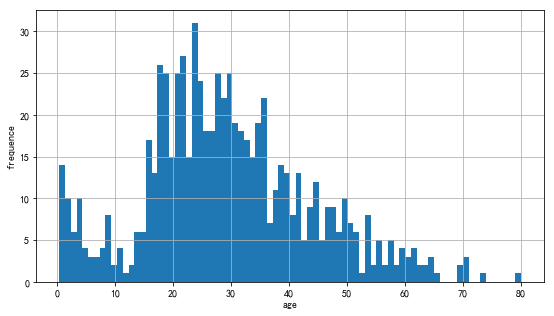

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(121)
df['Age'].hist(bins=80)
plt.xlabel('age')
plt.ylabel('frequence')
plt.show()

In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,Survived,Pclass,Age,SibSp,Parch,Fare
0.1,0.0,1.0,14.0,0.0,0.0,7.5500
0.2,0.0,1.0,19.0,0.0,0.0,7.8542
0.3,0.0,2.0,22.0,0.0,0.0,8.0500
0.4,0.0,2.0,25.0,0.0,0.0,10.5000
0.5,0.0,3.0,28.0,0.0,0.0,14.4542
0.6,0.0,3.0,31.8,0.0,0.0,21.6792
0.7,1.0,3.0,36.0,1.0,0.0,27.0000
0.8,1.0,3.0,41.0,1.0,1.0,39.6875
0.9,1.0,3.0,50.0,1.0,2.0,77.9583
1.0,1.0,3.0,80.0,8.0,6.0,512.3292


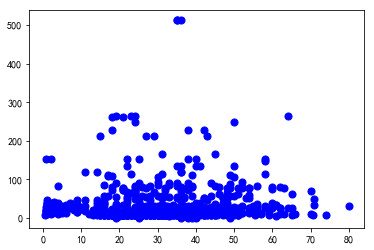

In [16]:
plt.scatter(df.Age,df.Fare,50,'blue')

In [17]:
pd.crosstab(df.Survived,df.Pclass).apply(lambda r:r/r.sum(),axis=0)

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


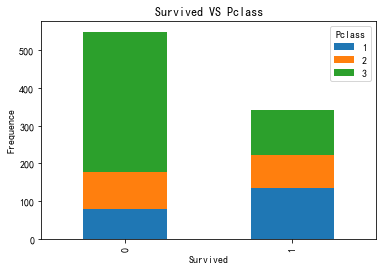

In [18]:
data=pd.crosstab(df.Survived,df.Pclass)
data.plot(kind='bar',stacked=True)
plt.title('Survived VS Pclass')
plt.ylabel('Frequence')
plt.show()

In [38]:
data2=df.groupby('Survived').agg({'Age':'mean','Fare':'mean'})

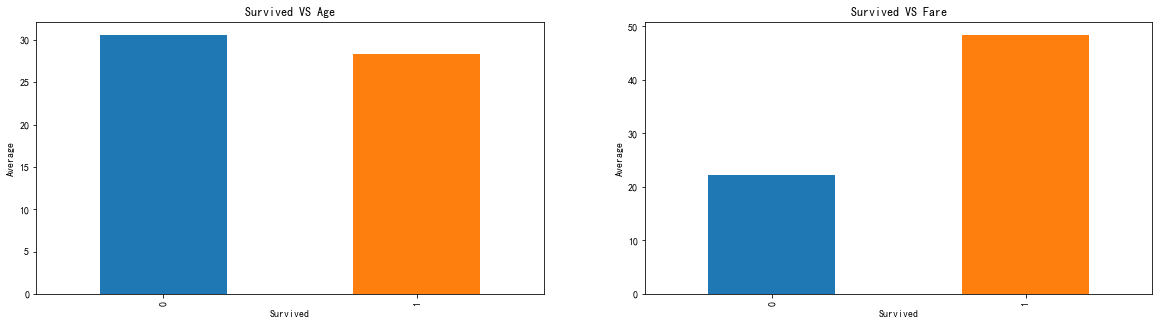

In [40]:

plt.figure(figsize=(20,5))
plt.subplot(121)
data2.Age.plot(kind='bar')
plt.title('Survived VS Age')
plt.ylabel('Average')
plt.subplot(122)
data2.Fare.plot(kind='bar')
plt.title('Survived VS Fare')
plt.ylabel('Average')
plt.show()

In [45]:
df['AgeIsNan']=0
df.loc[df['Age'].isnull(),'AgeIsNan']=1
df.AgeIsNan.value_counts()

0    714
1    177
Name: AgeIsNan, dtype: int64

In [47]:
age_mean=round(df['Age'].mean())
df['Age'].fillna(age_mean,inplace=True)
df.Age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [48]:
PclassOneHot=pd.get_dummies(df.Pclass,prefix='Pclass')
print(PclassOneHot.head())

   Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1


In [54]:
cut_points=[0,18,25,40,60,100]
df['AgeBin']=pd.cut(df.Age,bins=cut_points)
df.AgeBin.value_counts()

(25, 40]     440
(18, 25]     162
(0, 18]      139
(40, 60]     128
(60, 100]     22
Name: AgeBin, dtype: int64

In [55]:
Age_bin_onthot=pd.get_dummies(df.AgeBin,prefix='AgeBin')
print(Age_bin_onthot.head())

   AgeBin_(0, 18]  AgeBin_(18, 25]  AgeBin_(25, 40]  AgeBin_(40, 60]  \
0               0                1                0                0   
1               0                0                1                0   
2               0                0                1                0   
3               0                0                1                0   
4               0                0                1                0   

   AgeBin_(60, 100]  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [1]:
scaler=preprocessing.StandardScaler().fit(df[['Age']])
df['Age_std']=scaler.transform(df[['Age']])
df.head()

NameError: name 'preprocessing' is not defined

In [62]:
scaler2=preprocessing.MinMaxScaler().fit(df[['Age']])
df['Age_normal']=scaler2.transform(df[['Age']])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeIsNan,AgeBin,Age_std,Age_normal
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,"(18, 25]",-0.597055,0.271174
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(25, 40]",0.634162,0.472229
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(25, 40]",-0.289251,0.321438
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,"(25, 40]",0.403309,0.434531
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,"(25, 40]",0.403309,0.434531


In [63]:
df_merge=pd.concat([df,PclassOneHot],axis=1)
print(df_merge.head())

   Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  AgeIsNan    AgeBin   Age_std  Age_normal  Pclass_1  \
0   NaN        S         0  (18, 25] -0.597055    0.271174         0   
1   C85        C         0  (25, 40]  0.634162    0.472229         1   
2   NaN        S         0  (25, 40] -0.289251    0.321438         0   
3  C123        S         0  (25, 40]  0.403309    0.434531         1   
4   NaN        S         0  (25, 40]  0.403309    0.434531         0   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3 

In [64]:
df['FamilySize']=df['SibSp']+df['Parch']+1
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  AgeIsNan    AgeBin   Age_std  Age_normal  FamilySize  
0   NaN        S         0  (18, 25] -0.597055    0.271174           2  
1   C85        C         0  (25, 40]  0.634162    0.472229           2  
2   NaN        S         0  (25, 40] -0.289251    0.321438           1  
3  C123        S         0  (25, 40]  0.403309    0.434531           2  
4   NaN        S         0  (25, 40]  0.403309    0.434531           1  


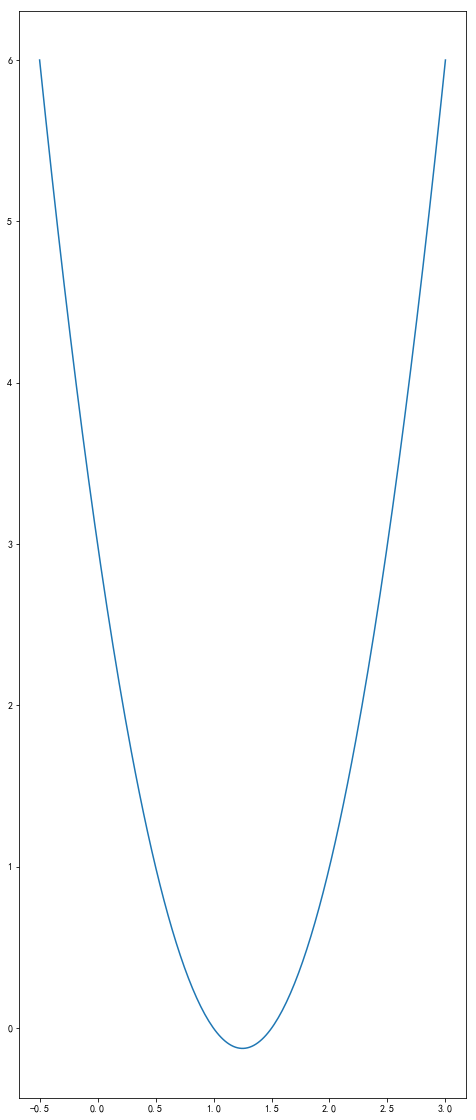

In [13]:
x=np.linspace(-0.5,3,200)
y=2*x*x-5*x+3
plt.figure(figsize=(8,20))
plt.plot(x,y)
plt.show()